# 3. Covid-19 samples from healthy, mild and severe patients
Chen ST, Park MD, Del Valle DM, Buckup M, Tabachnikova A, Thompson RC, et al. A shift in lung macrophage composition is associated with COVID-19 severity and recovery. Sci Transl Med. 2022;14:eabn5168

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scanpro functions
from scanpro import scanpro
from scanpro.utils import convert_counts_to_df

In [2]:
# path where figures are going to be saved
FIG_PATH = 'plots'

------------------

## Read data

In [3]:
covid_counts = pd.read_csv("data/covid_counts.tsv", sep='\t')
covid = convert_counts_to_df(covid_counts, column_name="celltype")

In [4]:
covid

,Sample,Group,Disease,celltype
cell_1,HC1,Healthy,N,B cells
cell_2,HC1,Healthy,N,B cells
cell_3,HC1,Healthy,N,B cells
cell_4,HC1,Healthy,N,B cells
cell_5,HC1,Healthy,N,B cells
...,...,...,...,...
cell_65809,S2,Severe,Y,pDC
cell_65810,S2,Severe,Y,pDC
cell_65811,S2,Severe,Y,pDC
cell_65812,S4,Severe,Y,pDC


----------

## Run Scanpro

### Logit

In [5]:
out_covid_logit = scanpro(covid, clusters_col='celltype', 
                          conds_col='Group', samples_col='Sample')
out_covid_logit.results

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


,baseline_props,mean_props_Healthy,mean_props_Mild,mean_props_Severe,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,
B cells,0.003343,0.003503,0.012990,0.004005,2.593405,1.030471e-01,1.472102e-01
Epithelial,0.053652,0.130246,0.051903,0.118455,1.536041,2.427651e-01,2.801274e-01
Macrophages,0.750870,0.735290,0.512996,0.604316,1.491742,2.521147e-01,2.801274e-01
Mast,0.001064,0.002337,0.002220,0.001699,1.164873,3.349114e-01,3.349114e-01
NK cells,0.016425,0.008894,0.052466,0.017979,4.841923,2.113110e-02,7.043700e-02
Neutrophil,0.024418,0.000000,0.001204,0.055594,92.441438,4.690858e-10,4.690858e-09
Plasma,0.015818,0.000224,0.002150,0.050913,10.404122,1.043908e-03,5.219539e-03
T cells,0.117241,0.094594,0.325030,0.137097,3.081910,7.122534e-02,1.275975e-01
mDC,0.014860,0.023776,0.030831,0.008876,2.984785,7.655851e-02,1.275975e-01


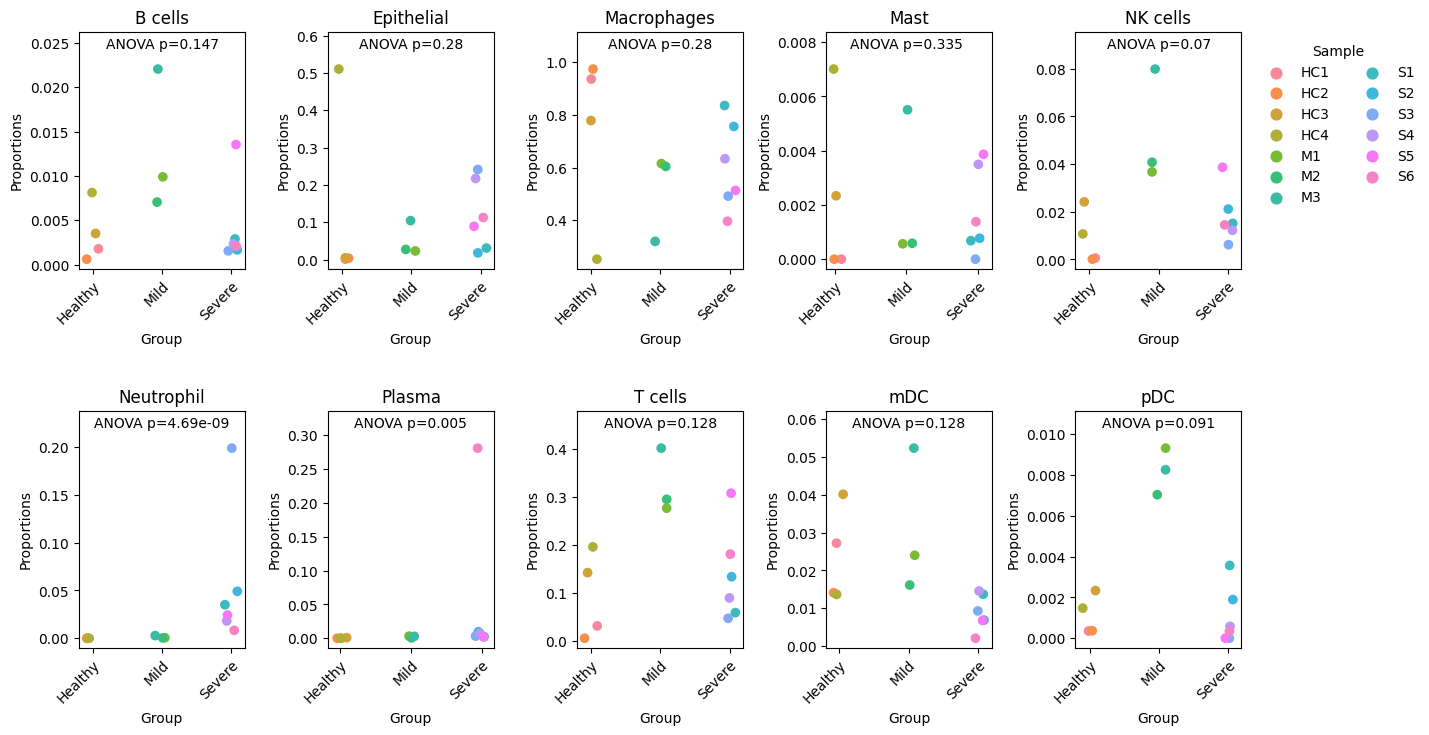

In [6]:
out_covid_logit.plot(n_columns=5, save=f"{FIG_PATH}/covid19_boxplot.pdf")

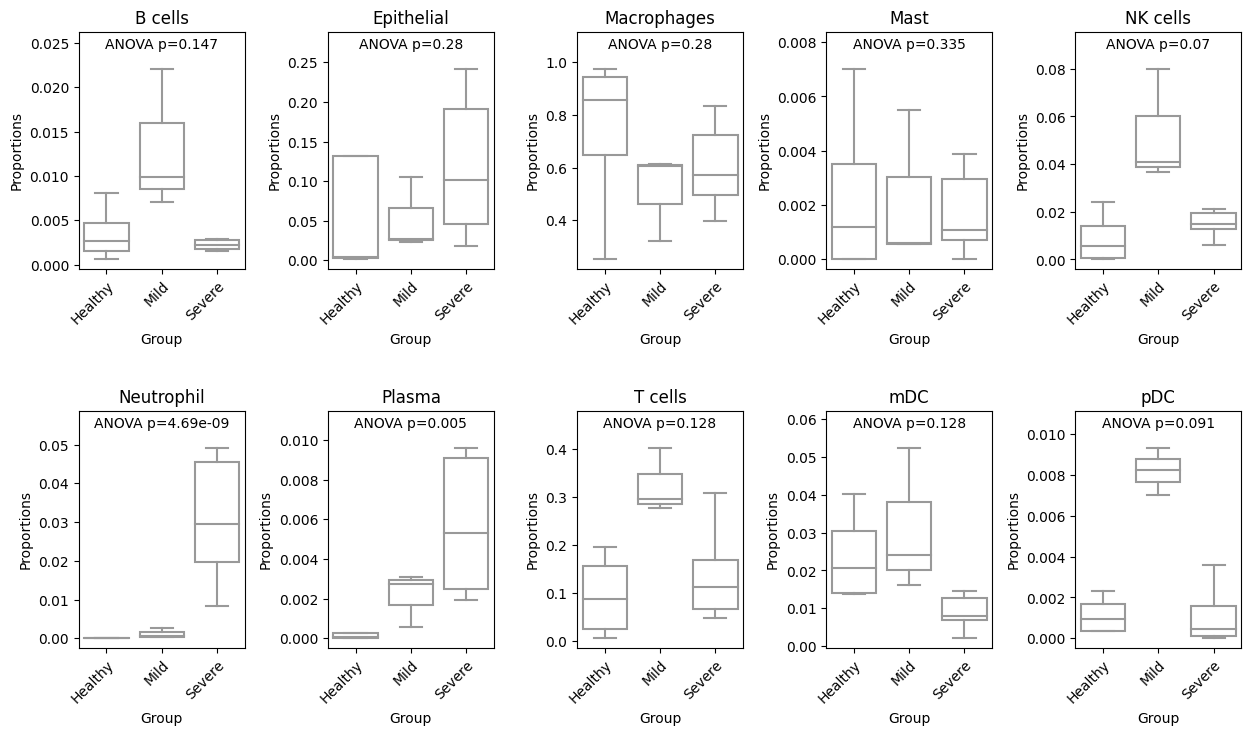

In [7]:
out_covid_logit.plot(kind='boxplot', n_columns=5, save=f"{FIG_PATH}/covid19_boxplot.pdf")

In [8]:
out_covid_logit.results.to_csv("results/covid_scanpro_rep_logit.tsv", sep="\t")

### arcsin

In [9]:
out_covid_arcsin = scanpro(covid, clusters_col='celltype', samples_col='Sample',
                           conds_col='Group', transform='arcsin')
out_covid_arcsin.results

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


,baseline_props,mean_props_Healthy,mean_props_Mild,mean_props_Severe,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,
B cells,0.003343,0.003503,0.012990,0.004005,3.200032,0.075373,0.125621
Epithelial,0.053652,0.130246,0.051903,0.118455,0.310040,0.738883,0.820981
Macrophages,0.750870,0.735290,0.512996,0.604316,1.237913,0.323129,0.403912
Mast,0.001064,0.002337,0.002220,0.001699,0.042212,0.958802,0.958802
NK cells,0.016425,0.008894,0.052466,0.017979,7.534890,0.007097,0.023658
Neutrophil,0.024418,0.000000,0.001204,0.055594,7.709304,0.006560,0.023658
Plasma,0.015818,0.000224,0.002150,0.050913,1.387393,0.285560,0.403912
T cells,0.117241,0.094594,0.325030,0.137097,5.454035,0.019765,0.049100
mDC,0.014860,0.023776,0.030831,0.008876,5.055541,0.024550,0.049100


In [10]:
out_covid_arcsin.results.to_csv("results/covid_scanpro_rep_arcsin.tsv", sep="\t")

----------

## Without replicates

### Logit

In [11]:
out_covid_boot_logit = scanpro(covid, clusters_col='celltype',
                               conds_col='Group', n_reps=8)

out_covid_boot_logit.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 13.47 seconds


,baseline_props,mean_props_Healthy,mean_props_Mild,mean_props_Severe,p_values
clusters,,,,,
B cells,0.003343,0.001372,0.007502,0.001958,0.159756
Epithelial,0.053652,0.061720,0.026265,0.045819,0.319534
Macrophages,0.750870,0.850207,0.599225,0.727359,0.032608
Mast,0.001064,0.000523,0.000415,0.000592,0.489110
NK cells,0.016425,0.003145,0.036964,0.015301,0.013150
Neutrophil,0.024418,0.000000,0.000249,0.038975,0.000005
Plasma,0.015818,0.000034,0.001086,0.023123,0.000183
T cells,0.117241,0.051069,0.285230,0.118617,0.008558
mDC,0.014860,0.019081,0.019148,0.007420,0.298066


In [12]:
out_covid_boot_logit.results.to_csv("results/covid_scanpro_norep_logit.tsv", sep="\t")

### Arcsin

In [13]:
out_covid_boot_arcsin = scanpro(covid, clusters_col='celltype',
                                conds_col='Group', n_reps=8, transform='arcsin')

out_covid_boot_arcsin.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 13.52 seconds


,baseline_props,mean_props_Healthy,mean_props_Mild,mean_props_Severe,p_values
clusters,,,,,
B cells,0.003343,0.001400,0.007493,0.001976,0.125247
Epithelial,0.053652,0.061655,0.026211,0.045517,0.151630
Macrophages,0.750870,0.850725,0.598391,0.726995,0.001332
Mast,0.001064,0.000519,0.000413,0.000593,0.658442
NK cells,0.016425,0.003127,0.036653,0.015235,0.005646
Neutrophil,0.024418,0.000000,0.000249,0.038993,0.000018
Plasma,0.015818,0.000035,0.001070,0.023040,0.000255
T cells,0.117241,0.051025,0.286811,0.118593,0.000141
mDC,0.014860,0.019017,0.019148,0.007329,0.203773


In [14]:
out_covid_boot_arcsin.results.to_csv("results/covid_scanpro_norep_arcsin.tsv", sep="\t")

#### Plasma cells have one sample as outlier, which affects the bootstrapping result

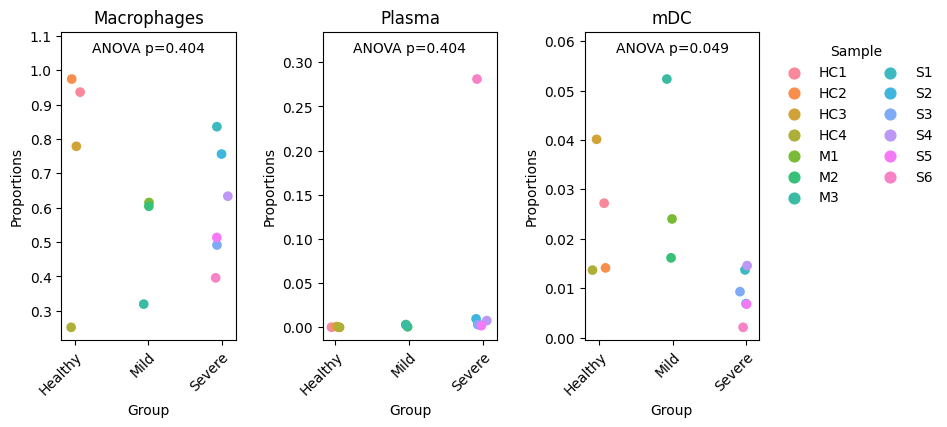

In [15]:
out_covid_arcsin.plot(n_columns=5, clusters=['Macrophages', 'Plasma', 'mDC'],
                      save=f'{FIG_PATH}/covid_stripplot_example.pdf')

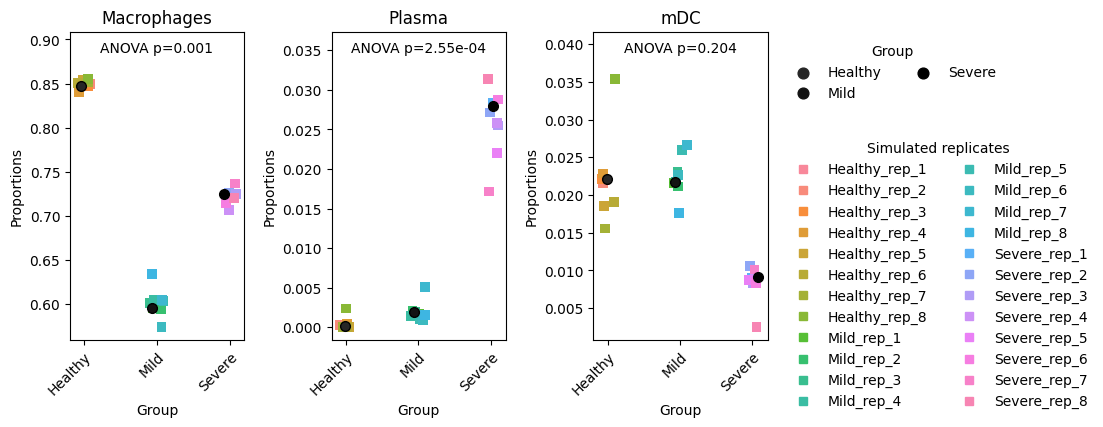

In [16]:
out_covid_boot_arcsin.plot(clusters=['Macrophages', 'Plasma', 'mDC'],
                           save=f'{FIG_PATH}/covid_stripplot_norep_example.pdf')

-----------------

# Run propeller

In [17]:
# Setup path to R
R_home = os.path.dirname(sys.executable)[:-4] + "/lib/R"
os.environ["R_HOME"] = R_home
%load_ext rpy2.ipython

In [18]:
%%R -i covid -o propeller_results_logit -o propeller_results_arcsin
library(speckle)

propeller_results_logit = propeller(clusters = covid$celltype, sample = covid$Sample, group = covid$Group, 
                                    transform = "logit")

propeller_results_arcsin = propeller(clusters = covid$celltype, sample = covid$Sample, group = covid$Group, 
                                    transform = "asin")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 
Performing logit transformation of proportions
group variable has > 2 levels, ANOVA will be performed
Performing arcsin square root transformation of proportions
group variable has > 2 levels, ANOVA will be performed


In [19]:
propeller_results_logit

,BaselineProp,PropMean.Healthy,PropMean.Mild,PropMean.Severe,Fstatistic,P.Value,FDR
Neutrophil,0.024418,-0.000000,0.001204,0.055594,34.534717,3.546468e-07,0.000004
Plasma,0.015818,0.000224,0.002150,0.050913,8.718137,2.056673e-03,0.010283
pDC,0.002310,0.001134,0.008210,0.001066,5.785273,1.052218e-02,0.034935
NK cells,0.016425,0.008894,0.052466,0.017979,5.391241,1.397389e-02,0.034935
T cells,0.117241,0.094594,0.325030,0.137097,3.155124,6.468749e-02,0.129375
mDC,0.014860,0.023776,0.030831,0.008876,2.484229,1.090338e-01,0.167374
B cells,0.003343,0.003503,0.012990,0.004005,2.394586,1.171617e-01,0.167374
Epithelial,0.053652,0.130246,0.051903,0.118455,1.813467,1.901866e-01,0.237733
Macrophages,0.750870,0.735290,0.512996,0.604316,1.620740,2.239111e-01,0.248790
Mast,0.001064,0.002337,0.002220,0.001699,0.692073,5.127128e-01,0.512713


In [20]:
propeller_results_arcsin

,BaselineProp,PropMean.Healthy,PropMean.Mild,PropMean.Severe,Fstatistic,P.Value,FDR
pDC,0.002310,0.001134,0.008210,0.001066,7.668004,0.007892,0.028010
Neutrophil,0.024418,-0.000000,0.001204,0.055594,7.699773,0.008007,0.028010
NK cells,0.016425,0.008894,0.052466,0.017979,7.520691,0.008403,0.028010
T cells,0.117241,0.094594,0.325030,0.137097,5.377659,0.023311,0.054665
mDC,0.014860,0.023776,0.030831,0.008876,5.037225,0.027333,0.054665
B cells,0.003343,0.003503,0.012990,0.004005,3.180201,0.080297,0.133829
Plasma,0.015818,0.000224,0.002150,0.050913,1.379356,0.291777,0.415445
Macrophages,0.750870,0.735290,0.512996,0.604316,1.218630,0.332356,0.415445
Epithelial,0.053652,0.130246,0.051903,0.118455,0.305296,0.742907,0.825452
Mast,0.001064,0.002337,0.002220,0.001699,0.046515,0.954732,0.954732


In [21]:
propeller_results_logit.to_csv("results/covid_propeller_rep_logit.tsv", sep="\t")
propeller_results_arcsin.to_csv("results/covid_propeller_rep_arcsin.tsv", sep="\t")

-----------------

# Run scCODA

In [22]:
import pertpy as pt
import anndata as ad

Installed version 0.4.0 of pertpy is outdated. Newest version is 0.5.0!

/home/mbentse/.conda/envs/scanpro_analysis/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mbentse/.conda/envs/scanpro_analysis/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mbentse/.conda/envs/scanpro_analysis/lib/python3.9

In [23]:
sccoda_adata = ad.AnnData(obs=covid)

## With replicates

In [24]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(sccoda_adata, type="cell_level", generate_sample_level=True, cell_type_identifier="celltype", 
                                sample_identifier="Sample", covariate_obs=["Group"])
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key="coda", formula="Group", reference_cell_type="Mast")

Zero counts encountered in data! Added a pseudocount of 0.5.

In [25]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda")

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
sample: 100%|██████████| 11000/11000 [03:10<00:00, 57.87it/s, 255 steps of size 1.99e-02. acc. prob=0.85]


In [26]:
sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=0.2)
sccoda_model.summary(sccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 13 samples, 10 cell types                                    │
│ Reference cell type                        │ Mast                                                               │
│ Formula                                    │ Group                                                              │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│              Final Parameter  Expected Sample                                                                   │
│ Cell Type                                                                                                       │
│ B cells          -1.102           123.180                                                                       │
│ Epithelial       -0.243           290.802                                                                       │
│ Macrophages       2.197          3336.387                                                                       │
│ Mast             -1.468            85.425                                                                       │
│ NK cells         -0.818           163.636                                                                       │
│ Neutrophil       -1.490            83.567                                                                       │
│ Plasma           -1.432            88.557                                                                       │
│ T cells           0.453           583.266                                                                       │
│ mDC              -0.535           217.162                                                                       │
│ pDC              -1.405            90.980                                                                       │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                            Final Parameter  Expected Sample  log2-fold change                                   │
│ Covariate     Cell Type                                                                                         │
│ GroupT.Mild   B cells          0.000             93.135           -0.403                                        │
│               Epithelial       0.000            219.873           -0.403                                        │
│               Macrophages      0.000           2522.607           -0.403                                        │
│               Mast             0.000             64.589           -0.403                                        │
│               NK cells         0.792            273.115            0.739                                        │
│               Neutrophil       0.000             63.184           -0.403                                        │
│               Plasma           0.000             66.957           -0.403                                        │
│               T cells          1.242           1526.519            1.388                                        │
│               mDC              0.000            164.194           -0.403                                        │
│               pDC              0.000             68.789           -0.403                                        │
│ GroupT.Severe B cells          0.000            114.162           -0.110                                        │
│               Epithelial       0.622            502.090            0.788                                        │
│               Macrophages      0.000           3092.132           -0.110                                        │
│               Mast             0.000             79.171           -0.110                                        │
│               NK cells         0.000            151.656           -0.110                                        │
│               Neutrophil       1.023            215.528            1.367                                        │
│               Plasma           0.000             82.074           -0.110                                        │
│               T cells          0.000            540.566           -0.110                                        │
│               mDC              0.000            201.264           -0.110                                        │
│               pDC              0.000             84.320           -0.110                                        │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [27]:
credible_effects = sccoda_model.credible_effects(sccoda_data, modality_key="coda").to_frame(name="credible_effect")
credible_effects

credible_effect
Covariate       Cell Type                   
Group[T.Mild]   B cells                False
                Epithelial             False
                Macrophages            False
                Mast                   False
                NK cells                True
                Neutrophil             False
                Plasma                 False
                T cells                 True
                mDC                    False
                pDC                    False
Group[T.Severe] B cells                False
                Epithelial              True
                Macrophages            False
                Mast                   False
                NK cells               False
                Neutrophil              True
                Plasma                 False
                T cells                False
                mDC                    False
                pDC                    False

In [28]:
credible_effects.to_csv("results/covid_sccoda_rep.tsv", sep="\t")

## Without replicates

In [29]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(sccoda_adata, type="cell_level", generate_sample_level=True, cell_type_identifier="celltype", 
                                sample_identifier="Group", covariate_obs=["Group"])
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key="coda", formula="Group", reference_cell_type="Mast")

Zero counts encountered in data! Added a pseudocount of 0.5.

In [30]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda")

sample: 100%|██████████| 11000/11000 [01:05<00:00, 166.85it/s, 255 steps of size 1.53e-02. acc. prob=0.71]


In [31]:
sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=0.2)
sccoda_model.summary(sccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 3 samples, 10 cell types                                    │
│ Reference cell type                         │ Mast                                                              │
│ Formula                                     │ Group                                                             │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│              Final Parameter  Expected Sample                                                                   │
│ Cell Type                                                                                                       │
│ B cells           0.164           105.286                                                                       │
│ Epithelial        2.616          1222.531                                                                       │
│ Macrophages       5.316         18190.927                                                                       │
│ Mast             -0.533            52.440                                                                       │
│ NK cells          0.939           228.532                                                                       │
│ Neutrophil       -1.068            30.713                                                                       │
│ Plasma           -0.647            46.790                                                                       │
│ T cells           2.867          1571.331                                                                       │
│ mDC               1.539           416.413                                                                       │
│ pDC              -0.204            72.870                                                                       │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                            Final Parameter  Expected Sample  log2-fold change                                   │
│ Covariate     Cell Type                                                                                         │
│ GroupT.Mild   B cells          0.000             87.995           -0.259                                        │
│               Epithelial       0.000           1021.763           -0.259                                        │
│               Macrophages      0.000          15203.552           -0.259                                        │
│               Mast             0.000             43.829           -0.259                                        │
│               NK cells         1.084            564.607            1.305                                        │
│               Neutrophil       0.000             25.669           -0.259                                        │
│               Plasma           0.000             39.106           -0.259                                        │
│               T cells          1.241           4542.381            1.531                                        │
│               mDC              0.000            348.028           -0.259                                        │
│               pDC              0.000             60.903           -0.259                                        │
│ GroupT.Severe B cells          0.000            100.259           -0.071                                        │
│               Epithelial       0.000           1164.160           -0.071                                        │
│               Macrophages      0.000          17322.392           -0.071                                        │
│               Mast             0.000             49.937           -0.071                                        │
│               NK cells         0.000            217.621           -0.071                                        │
│               Neutrophil       3.093            644.370            4.391                                        │
│               Plasma           2.370            476.865            3.349                                        │
│               T cells          0.000           1496.307           -0.071                                        │
│               mDC              0.000            396.531           -0.071                                        │
│               pDC              0.000             69.391           -0.071                                        │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [32]:
credible_effects = sccoda_model.credible_effects(sccoda_data, modality_key="coda").to_frame(name="credible_effect")
credible_effects

credible_effect
Covariate       Cell Type                   
Group[T.Mild]   B cells                False
                Epithelial             False
                Macrophages            False
                Mast                   False
                NK cells                True
                Neutrophil             False
                Plasma                 False
                T cells                 True
                mDC                    False
                pDC                    False
Group[T.Severe] B cells                False
                Epithelial             False
                Macrophages            False
                Mast                   False
                NK cells               False
                Neutrophil              True
                Plasma                  True
                T cells                False
                mDC                    False
                pDC                    False

In [33]:
credible_effects.to_csv("results/covid_sccoda_norep.tsv", sep="\t")